In [6]:
from qiskit.circuit.library import CCXGate
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService

### zad 1. Używając dowolnego dokładnego symulatora (IBM statevector simulator albo QUIDE) stwórz odpowiedni obwód i potwierdź swoje wyliczenia z zadania obliczeniowego

In [51]:
def increment(qc):
    clause_qubits = [1, 2]
    output_qubits = [0]
    qc.append(CCXGate(),[clause_qubits[0], clause_qubits[1], output_qubits[0]])
    qc.cx(2, 1)
    qc.barrier(0, 1, 2)

    
def decrement(qc):
    qc.x(1)
    qc.x(2)
    clause_qubits = [1, 2]
    output_qubits = [0]
    qc.append(CCXGate(),[clause_qubits[0], clause_qubits[1], output_qubits[0]])
    qc.x(1)
    qc.cx(2, 1)
    qc.x(2)
    qc.barrier(0, 1, 2)
    

def create_quantum_walk(steps, do_display=True):
    qnumber = 3
    cnumber = 2
    qc = QuantumCircuit(qnumber, cnumber)
    for i in range(steps):
        qc.h(2)
        qc.barrier(0, 1, 2)
        increment(qc)
        decrement(qc)
    if do_display:
        display(qc.draw())
    return qc


def run_statevector(qc):
    state = Statevector.from_instruction(qc)
    
    # drop q2
    reduced_density_matrix = partial_trace(state, [2])
    diag_elements = reduced_density_matrix.data.diagonal()
    reduced_state = Statevector(diag_elements)
    
    ideal_dist = reduced_state.probabilities_dict()
    display(plot_histogram(ideal_dist))

0


q_0: 
     
q_1: 
     
q_2: 
     
c: 2/

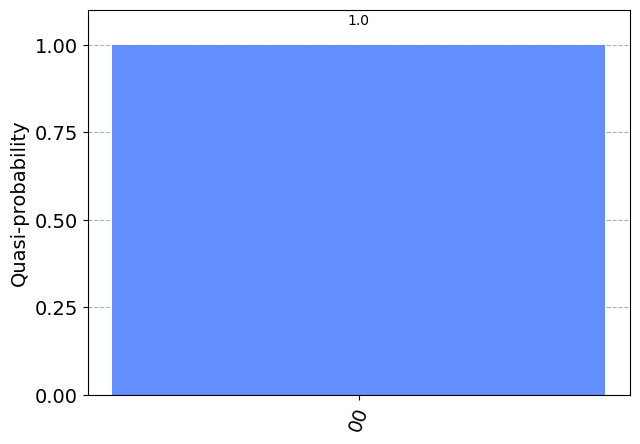

1


░ ┌───┐      ░      ┌───┐                ░ 
q_0: ──────░─┤ X ├──────░──────┤ X ├────────────────░─
           ░ └─┬─┘┌───┐ ░ ┌───┐└─┬─┘┌───┐┌───┐      ░ 
q_1: ──────░───■──┤ X ├─░─┤ X ├──■──┤ X ├┤ X ├──────░─
     ┌───┐ ░   │  └─┬─┘ ░ ├───┤  │  └───┘└─┬─┘┌───┐ ░ 
q_2: ┤ H ├─░───■────■───░─┤ X ├──■─────────■──┤ X ├─░─
     └───┘ ░            ░ └───┘               └───┘ ░ 
c: 2/═════════════════════════════════════════════════

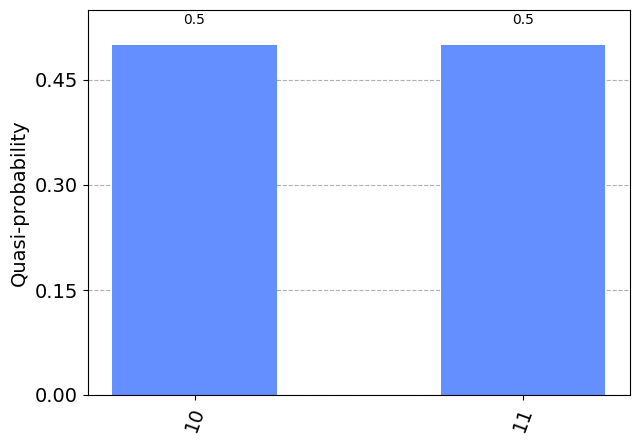

2


░ ┌───┐      ░      ┌───┐                ░       ░ ┌───┐      ░ »
q_0: ──────░─┤ X ├──────░──────┤ X ├────────────────░───────░─┤ X ├──────░─»
           ░ └─┬─┘┌───┐ ░ ┌───┐└─┬─┘┌───┐┌───┐      ░       ░ └─┬─┘┌───┐ ░ »
q_1: ──────░───■──┤ X ├─░─┤ X ├──■──┤ X ├┤ X ├──────░───────░───■──┤ X ├─░─»
     ┌───┐ ░   │  └─┬─┘ ░ ├───┤  │  └───┘└─┬─┘┌───┐ ░ ┌───┐ ░   │  └─┬─┘ ░ »
q_2: ┤ H ├─░───■────■───░─┤ X ├──■─────────■──┤ X ├─░─┤ H ├─░───■────■───░─»
     └───┘ ░            ░ └───┘               └───┘ ░ └───┘ ░            ░ »
c: 2/══════════════════════════════════════════════════════════════════════»
                                                                           »
«          ┌───┐                ░ 
«q_0: ─────┤ X ├────────────────░─
«     ┌───┐└─┬─┘┌───┐┌───┐      ░ 
«q_1: ┤ X ├──■──┤ X ├┤ X ├──────░─
«     ├───┤  │  └───┘└─┬─┘┌───┐ ░ 
«q_2: ┤ X ├──■─────────■──┤ X ├─░─
«     └───┘               └───┘ ░ 
«c: 2/════════════════════════════
«

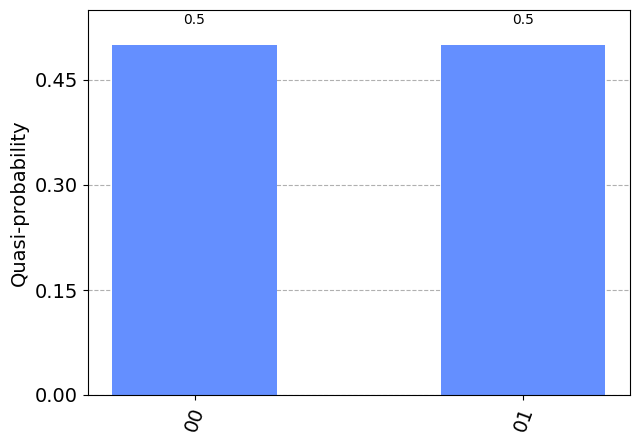

3


░ ┌───┐      ░      ┌───┐                ░       ░ ┌───┐      ░ »
q_0: ──────░─┤ X ├──────░──────┤ X ├────────────────░───────░─┤ X ├──────░─»
           ░ └─┬─┘┌───┐ ░ ┌───┐└─┬─┘┌───┐┌───┐      ░       ░ └─┬─┘┌───┐ ░ »
q_1: ──────░───■──┤ X ├─░─┤ X ├──■──┤ X ├┤ X ├──────░───────░───■──┤ X ├─░─»
     ┌───┐ ░   │  └─┬─┘ ░ ├───┤  │  └───┘└─┬─┘┌───┐ ░ ┌───┐ ░   │  └─┬─┘ ░ »
q_2: ┤ H ├─░───■────■───░─┤ X ├──■─────────■──┤ X ├─░─┤ H ├─░───■────■───░─»
     └───┘ ░            ░ └───┘               └───┘ ░ └───┘ ░            ░ »
c: 2/══════════════════════════════════════════════════════════════════════»
                                                                           »
«          ┌───┐                ░       ░ ┌───┐      ░      ┌───┐          »
«q_0: ─────┤ X ├────────────────░───────░─┤ X ├──────░──────┤ X ├──────────»
«     ┌───┐└─┬─┘┌───┐┌───┐      ░       ░ └─┬─┘┌───┐ ░ ┌───┐└─┬─┘┌───┐┌───┐»
«q_1: ┤ X ├──■──┤ X ├┤ X ├──────░───────░───■──┤ X ├─░─┤ X ├──■──┤ X ├┤ X ├»
«     ├───┤  │  └───┘└─┬─┘┌───┐ ░ ┌───┐ ░   │  └─┬─┘ ░ ├───┤  │  └───┘└─┬─┘»
«q_2: ┤ X ├──■─────────■──┤ X ├─░─┤ H ├─░───■────■───░─┤ X ├──■─────────■──»
«     └───┘               └───┘ ░ └───┘ ░            ░ └───┘               »
«c: 2/═════════════════════════════════════════════════════════════════════»
«                                                                          »
«           ░ 
«q_0: ──────░─
«           ░ 
«q_1: ──────░─
«     ┌───┐ ░ 
«q_2: ┤ X ├─░─
«     └───┘ ░ 
«c: 2/════════
«

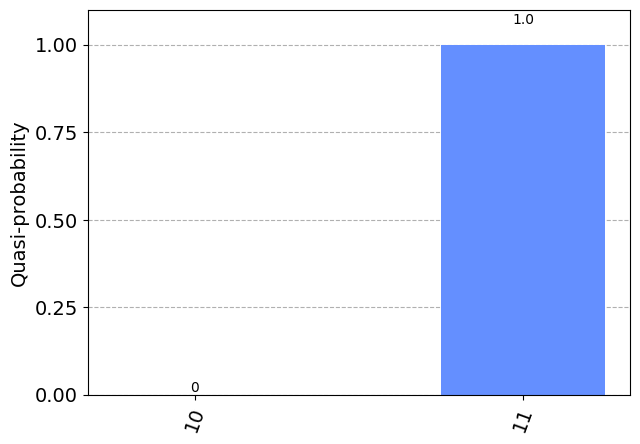

4


░ ┌───┐      ░      ┌───┐                ░       ░ ┌───┐      ░ »
q_0: ──────░─┤ X ├──────░──────┤ X ├────────────────░───────░─┤ X ├──────░─»
           ░ └─┬─┘┌───┐ ░ ┌───┐└─┬─┘┌───┐┌───┐      ░       ░ └─┬─┘┌───┐ ░ »
q_1: ──────░───■──┤ X ├─░─┤ X ├──■──┤ X ├┤ X ├──────░───────░───■──┤ X ├─░─»
     ┌───┐ ░   │  └─┬─┘ ░ ├───┤  │  └───┘└─┬─┘┌───┐ ░ ┌───┐ ░   │  └─┬─┘ ░ »
q_2: ┤ H ├─░───■────■───░─┤ X ├──■─────────■──┤ X ├─░─┤ H ├─░───■────■───░─»
     └───┘ ░            ░ └───┘               └───┘ ░ └───┘ ░            ░ »
c: 2/══════════════════════════════════════════════════════════════════════»
                                                                           »
«          ┌───┐                ░       ░ ┌───┐      ░      ┌───┐          »
«q_0: ─────┤ X ├────────────────░───────░─┤ X ├──────░──────┤ X ├──────────»
«     ┌───┐└─┬─┘┌───┐┌───┐      ░       ░ └─┬─┘┌───┐ ░ ┌───┐└─┬─┘┌───┐┌───┐»
«q_1: ┤ X ├──■──┤ X ├┤ X ├──────░───────░───■──┤ X ├─░─┤ X ├──■──┤ X ├┤ X ├»
«     ├───┤  │  └───┘└─┬─┘┌───┐ ░ ┌───┐ ░   │  └─┬─┘ ░ ├───┤  │  └───┘└─┬─┘»
«q_2: ┤ X ├──■─────────■──┤ X ├─░─┤ H ├─░───■────■───░─┤ X ├──■─────────■──»
«     └───┘               └───┘ ░ └───┘ ░            ░ └───┘               »
«c: 2/═════════════════════════════════════════════════════════════════════»
«                                                                          »
«           ░       ░ ┌───┐      ░      ┌───┐                ░ 
«q_0: ──────░───────░─┤ X ├──────░──────┤ X ├────────────────░─
«           ░       ░ └─┬─┘┌───┐ ░ ┌───┐└─┬─┘┌───┐┌───┐      ░ 
«q_1: ──────░───────░───■──┤ X ├─░─┤ X ├──■──┤ X ├┤ X ├──────░─
«     ┌───┐ ░ ┌───┐ ░   │  └─┬─┘ ░ ├───┤  │  └───┘└─┬─┘┌───┐ ░ 
«q_2: ┤ X ├─░─┤ H ├─░───■────■───░─┤ X ├──■─────────■──┤ X ├─░─
«     └───┘ ░ └───┘ ░            ░ └───┘               └───┘ ░ 
«c: 2/═════════════════════════════════════════════════════════
«

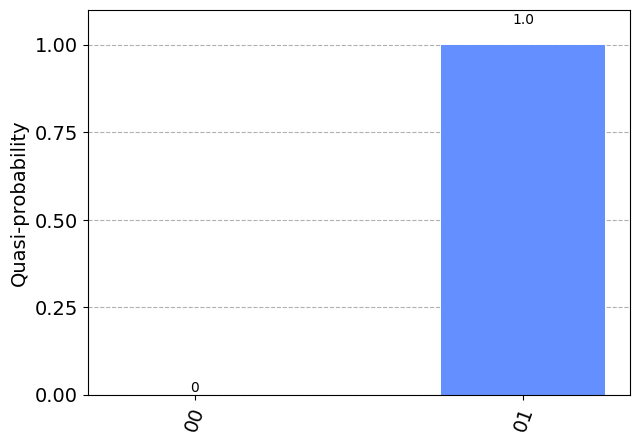

In [52]:
for i in range(0, 5):
    print(i)
    run_statevector(create_quantum_walk(i))

Po uwzględnieniu kolejności qubitów wyniki się zgadzają

### zad 2. Uruchom układ dla 1,2, 3, 4 kroków używając wybranego symulatora oraz wybranego prawdziwego urządzenia kwantowego, tak aby porównać histogramy.  Zaobserwuj jak błędy zwiększają się wraz z ilością kroków.

#### Simulator

In [55]:
def run_simulator(steps):
    qc = create_quantum_walk(steps, do_display=False)
    qc.measure(qubit=0, cbit=0)
    qc.measure(qubit=1, cbit=1)
    from qiskit.primitives import Sampler as PSampler
    results = PSampler().run(qc, shots=1024).result()
    return results.quasi_dists[0].binary_probabilities()

0


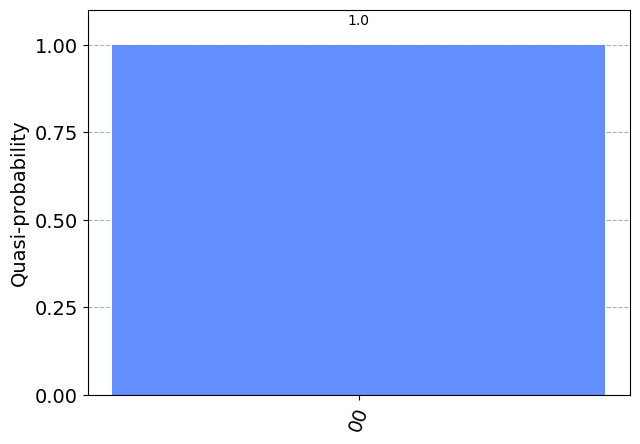

1


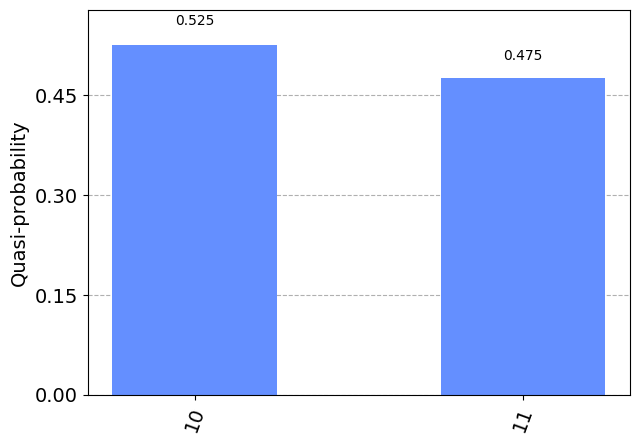

2


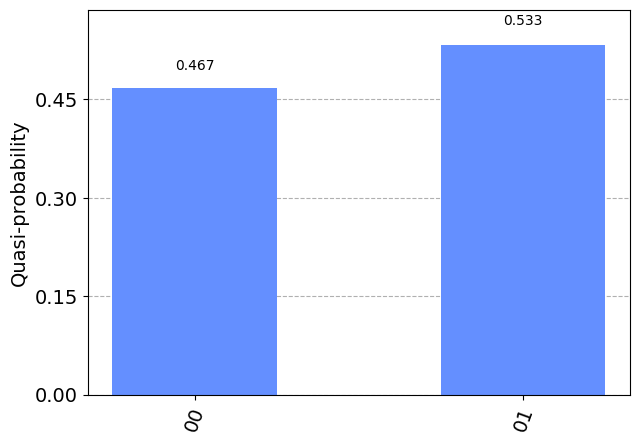

3


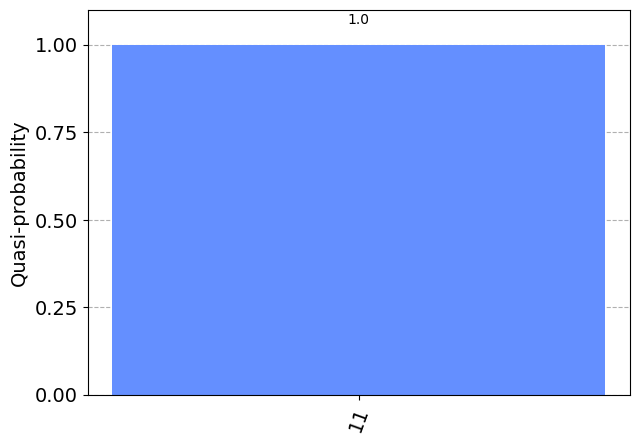

4


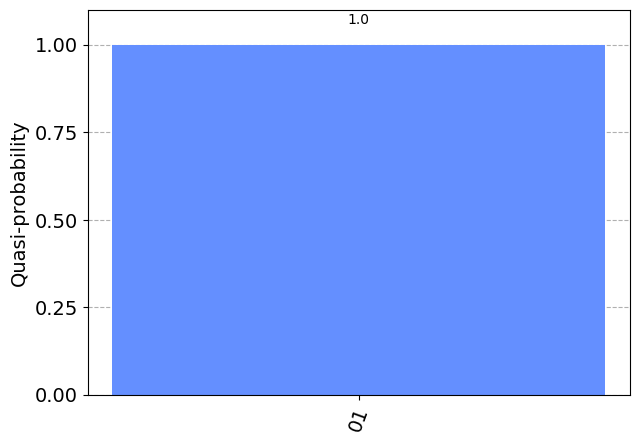

In [56]:
sim_dists = []
for i in range(0, 5):
    print(i)
    sim_dists.append(run_simulator(i))
    display(plot_histogram(sim_dists[-1]))

#### Real device

In [57]:
service = QiskitRuntimeService()
backend = service.backend('ibm_osaka')


def transpile_qc(qc, optimization_level=3):
    t_qc = transpile(qc, backend, optimization_level=optimization_level, seed_transpiler=0)
    print(f"optimization_level={optimization_level}: ", t_qc.count_ops())
    t_qc.draw(output="mpl", style="iqp", idle_wires=False)
    return t_qc


def submit_job(t_qc):
    from qiskit_ibm_runtime import Batch, Sampler
    with Batch(service=service, backend=backend):
        sampler = Sampler()
        job = sampler.run(
            circuits=[t_qc],
            shots=100,
        )
        print(f'job_id: {job.job_id()}')
        
        
def retrieve_result(job_id):
    result_dev = service.job(job_id).result()
    return result_dev.quasi_dists[0].binary_probabilities()


def run_real_device(steps):
    qc = create_quantum_walk(steps, do_display=False)
    qc.measure(qubit=0, cbit=0)
    qc.measure(qubit=1, cbit=1)
    t_qc = transpile_qc(qc)
    submit_job(t_qc)

In [58]:
for i in range(0, 5):
    print(i)
    run_real_device(i)

0
optimization_level=3:  OrderedDict({'measure': 2})
job_id: csdhmvk3dkhg008zk770
1
optimization_level=3:  OrderedDict({'rz': 74, 'sx': 49, 'ecr': 22, 'x': 10, 'barrier': 3, 'measure': 2})
job_id: csdhmwbdape00085zpb0
2
optimization_level=3:  OrderedDict({'rz': 181, 'sx': 138, 'ecr': 56, 'x': 24, 'barrier': 6, 'measure': 2})
job_id: csdhmxkca010008xcpbg
3
optimization_level=3:  OrderedDict({'rz': 288, 'sx': 227, 'ecr': 90, 'x': 38, 'barrier': 9, 'measure': 2})


IBMRuntimeError: 'Failed to run program: \'409 Client Error: Conflict for url: https://api.quantum.ibm.com/runtime/jobs. {"errors":[{"message":"You have reached the limit of 3 pending  jobs. Please wait for a job to complete or cancel one before submitting anything new.","code":3458,"solution":"Wait until some previous jobs were finished. You can cancel pending jobs to run new jobs.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}\''

In [59]:
for i in range(3, 5):
    print(i)
    run_real_device(i)

3
optimization_level=3:  OrderedDict({'rz': 288, 'sx': 227, 'ecr': 90, 'x': 38, 'barrier': 9, 'measure': 2})
job_id: csdhy2rx35wg00813qf0
4
optimization_level=3:  OrderedDict({'rz': 395, 'sx': 316, 'ecr': 124, 'x': 52, 'barrier': 12, 'measure': 2})
job_id: csdhy50tj7dg008cggv0


0


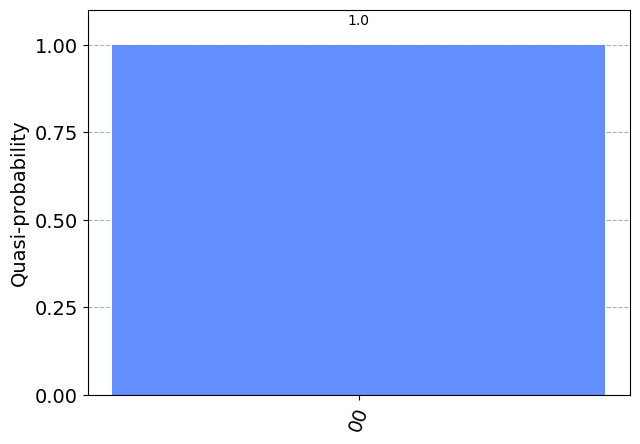

1


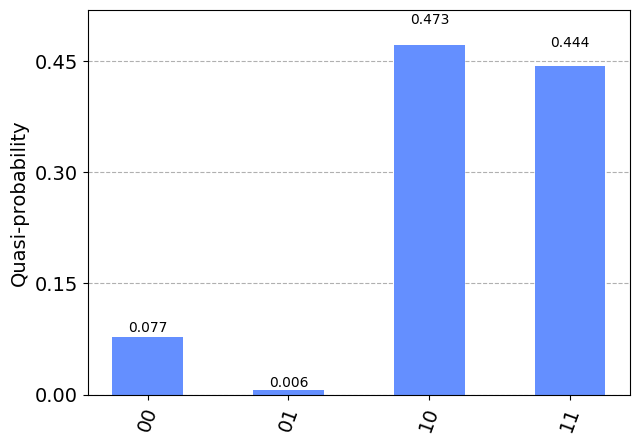

2


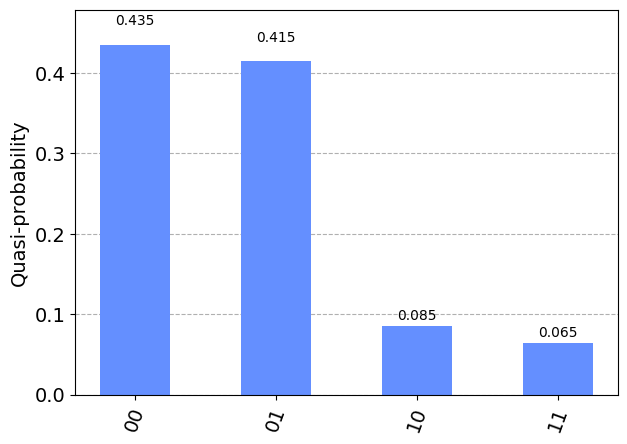

3


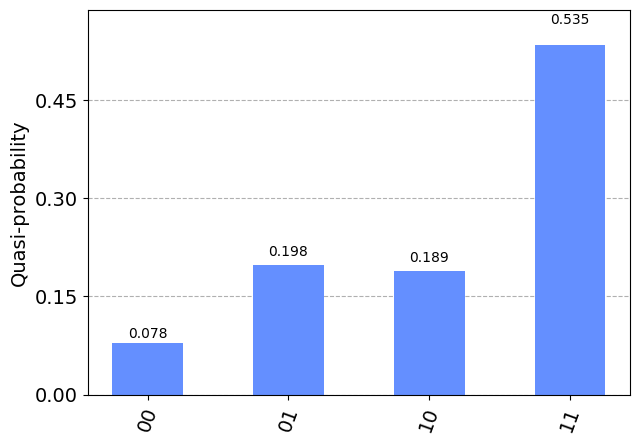

4


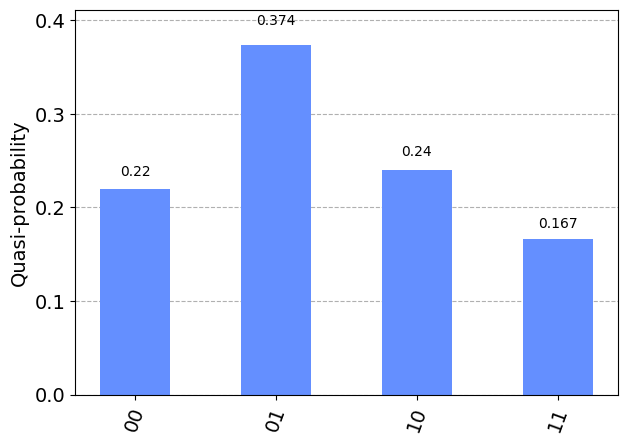

In [60]:
job_ids = ['csdhmvk3dkhg008zk770', 'csdhmwbdape00085zpb0', 'csdhmxkca010008xcpbg', 'csdhy2rx35wg00813qf0', 'csdhy50tj7dg008cggv0']
real_dists = []
for i in range(5):
    print(i)
    real_dists.append(retrieve_result(job_ids[i]))
    display(plot_histogram(real_dists[-1]))

#### Comparison

0


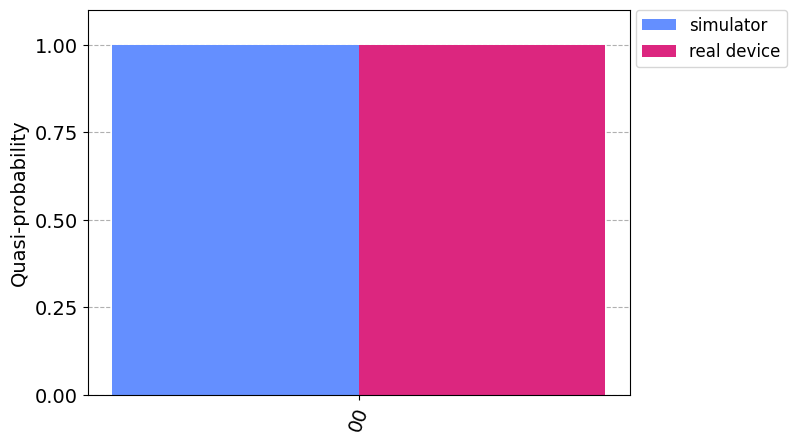

1


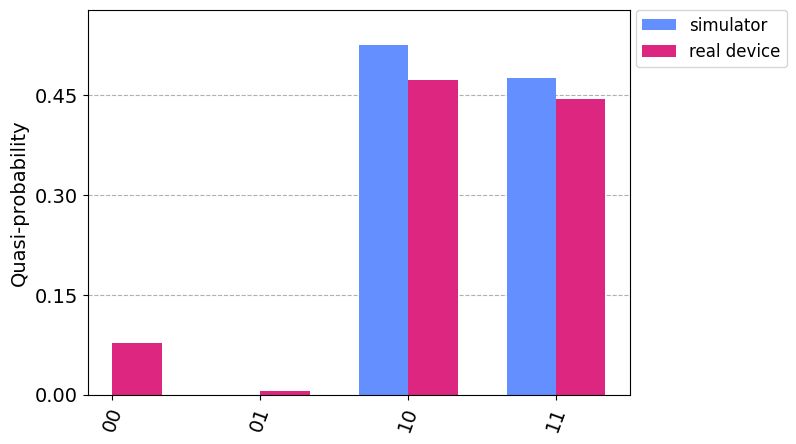

2


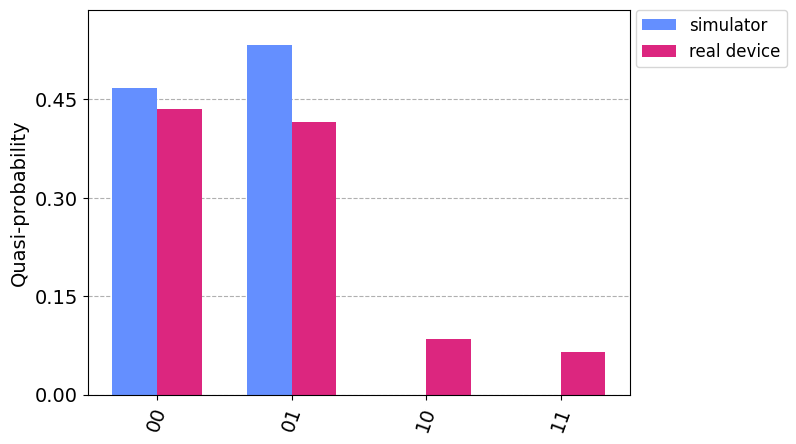

3


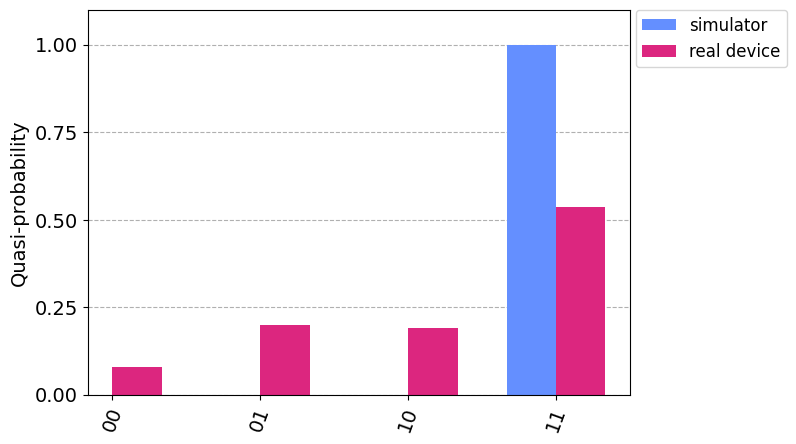

4


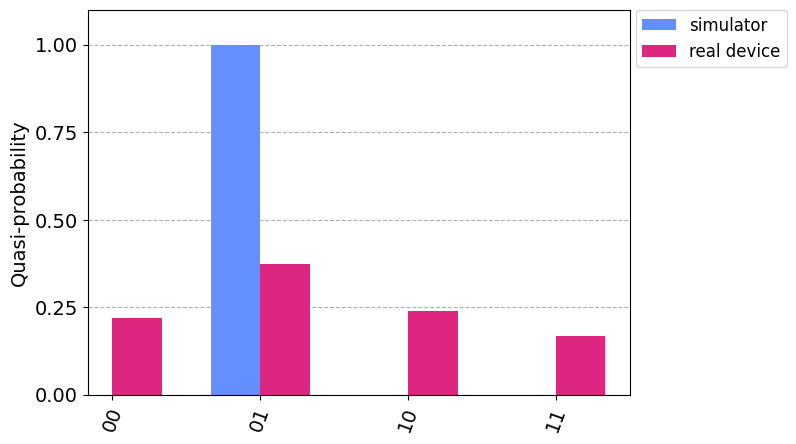

In [62]:
for i in range(5):
    print(i)
    binary_prob = [sim_dists[i], real_dists[i]]
    display(
        plot_histogram(
            binary_prob,
            bar_labels=False,
            legend=[
                "simulator",
                "real device",
            ],
        )
    )

Na prawdziwym urządzeniu błędy bardzo się kumulują.